In [4]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Нюансы: 
1. Реализовал генератор слов, а не букв. Из-за этого не сделал матрику вероятностей. 
2. В ячейке 24 посчитана вероятность для фразы: поймете * * страсти. Но не уверне, что правильно использовал формулу, а именно второй и третий элементы.
2. В работе использовал 1 том, т.к. при работе с 4-мя томами не хватило оперативки. 

In [15]:
text = ''
for i in range(1, 5):
#     with open('tom_'+str(i)+'.txt', 'r') as f:
    with open('tom_1.txt', 'r') as f:
        text += f.read().lower()
text = re.sub('[^а-я]',' ', text)


In [16]:
text = re.sub('        ',' ', text)

In [17]:
# text_file = open('data.txt', 'r') text = text_file.read() 
#cleaning 
text = text.lower() 
words = text.split() 
words = [word.strip('.,!;()[]') for word in words] 
words = [word.replace("'s", '') for word in words] 

#finding unique 
unique = [] 
for word in words: 
    if word not in unique: 
        unique.append(word) 
#sort 
unique.sort() 

#print 
print(unique)

['а', 'аааа', 'аббат', 'аббата', 'аббатом', 'абота', 'аботали', 'авангард', 'авангарда', 'авангардом', 'авангарду', 'аванпостах', 'аванпостов', 'аванпосты', 'августа', 'августейшей', 'августейший', 'авда', 'австриец', 'австрии', 'австрийские', 'австрийский', 'австрийским', 'австрийскими', 'австрийских', 'австрийского', 'австрийское', 'австрийской', 'австрийском', 'австрийскому', 'австрийскую', 'австрийцам', 'австрийцами', 'австрийцах', 'австрийцев', 'австрийцу', 'австрийцы', 'австрию', 'австрия', 'австрияк', 'авторском', 'агонии', 'адам', 'адвокат', 'адрес', 'адреса', 'адресе', 'адресовать', 'адъютант', 'адъютанта', 'адъютантам', 'адъютантами', 'адъютантика', 'адъютантикам', 'адъютантики', 'адъютантов', 'адъютантом', 'адъютанту', 'адъютанты', 'аж', 'азарта', 'азбуки', 'азделяю', 'азовского', 'ай', 'академию', 'аккуратно', 'аккуратность', 'аккуратностью', 'актер', 'актерства', 'актрисам', 'актрисы', 'акушером', 'акцентом', 'ал', 'алгебры', 'але', 'александр', 'александра', 'александре',

In [18]:
POS = {l: i for i, l in enumerate(unique)}

In [19]:
probabilities = np.zeros((len(unique), len(unique)))

In [20]:
for cp, cn in zip(words[:-1], words[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [21]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [22]:
text

'      лев толстой  война и мир  том   том  часть первая                    часть   орая                 часть третья                   том     лев николаевич толстой  война и мир  том       часть первая      е         поместья                                         мой верный раб       ну  что  князь  генуа и лукка стали не больше  как поместьями фамилии бонапарте  нет  я вас предупреждаю  если вы мне не скажете  что у нас война  если вы еще позволите себе защищать все гадости  все ужасы этого антихриста  право  я верю  что он антихрист    я вас больше не знаю  вы уж не друг мой  вы уж не мой верный раб  как вы говорите   ну  здравствуйте  здравствуйте      я вижу  что я вас пугаю   садитесь и рассказывайте   так говорила в июле      года известная анна павловна шерер  фрейлина и приближенная императрицы марии феодоровны  встречая важного и чиновного князя василия  первого приехавшего на ее вечер  анна павловна кашляла несколько дней  у нее был грипп  как она говорила  грипп был тогд

In [24]:
start = 'поймете'
end = 'страсти'
prior = 1. / len(unique)
unique_2 = unique
proba = 0
for c in unique:
    for k in unique_2:
        proba += prior * probabilities[POS[start], POS[c]] * probabilities[POS[c], POS[k]]  * probabilities[POS[k],  POS[end]]

print(proba)

1.688642662273494e-07


In [25]:
s = []
# start = np.random.choice(list(unique))
start = 'я'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(unique), p=probabilities[index])
    s.append(next_char)

print (' '.join(s))

я еще день был тот жилет мужа у меня


In [5]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

In [6]:
sales_of_company_x = pd.read_csv("../1/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("../1/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("../1/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("../1/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("../1/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("../1/Series/daily-total-female-births-in-cal.csv")

In [7]:
series2 = sales_of_company_x['Count'] # series1 = pd.read_csv("../1/Series/weekly-closings-of-the-dowjones-.csv")['Close']
# tsplot(series2)

In [8]:
values = series2.values.reshape(-1,1)

In [9]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)

Fitting a model with 79 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 98 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


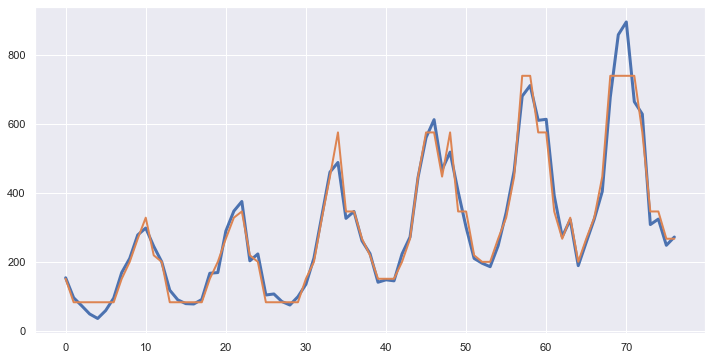

In [76]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values, linewidth=3)
plt.plot(means, linewidth=2)